## Install Necessary Python Modules for the project

In [ ]:
!pip install numpy pandas scikit-learn nltk matplotlib
!pip install seaborn
!conda install nltk -y
!conda install wordcloud -y
!pip install wordcloud
!pip install BernoulliNB

## Import all the necessary Modules

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadityabaniya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read the csv file and make panda columns

In [3]:
### importing the dataset with spam messages in it
df = pd.read_csv('spam.csv', encoding='latin-1')


In [4]:
# check the shape of df
df.shape


(5572, 5)

## Drop unwanted columns

In [5]:
# drop columns (cleaning the data)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


## Rename the columns for better readability

In [6]:
# rename the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)

## Id with 0 is not scam and 1 is scam

In [7]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
# 1 scam
# 0 not scam


## Dropping the duplicate values

In [8]:
# drop duplicates
df = df.drop_duplicates(keep='first')


## Showing the precentage of ham and spam messages in a pie chart

([<matplotlib.patches.Wedge at 0x7fc568db6df0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

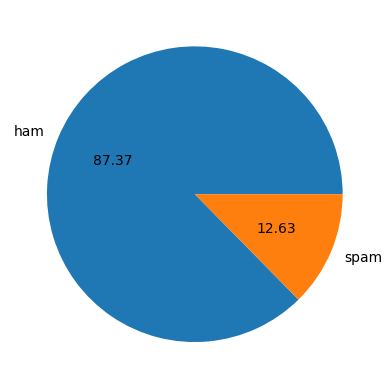

In [9]:
# showing in a pie chart
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'],  autopct="%0.2f")


## Number of tokens(chars) in a sentence

In [10]:
# counting number of characters and making a new column
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Number of words in a sentence(ham and spam)

In [11]:
# num of words (todo)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

## Describing the Table

In [13]:
# analyzing number of characters and words
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,15.340685
std,58.236293,11.068488
min,2.000000,1.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [14]:
# for ham messages
df[df['target'] == 0][['num_characters','num_words']].describe()


,num_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,14.134632
std,56.358207,11.116240
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


In [15]:
# for spam messages
df[df['target'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,23.681470
std,30.137753,5.967672
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


In [16]:
import seaborn as sns

# Illustrating the diagram showing number of tokens in ham vs spam

<Axes: xlabel='num_characters', ylabel='Count'>

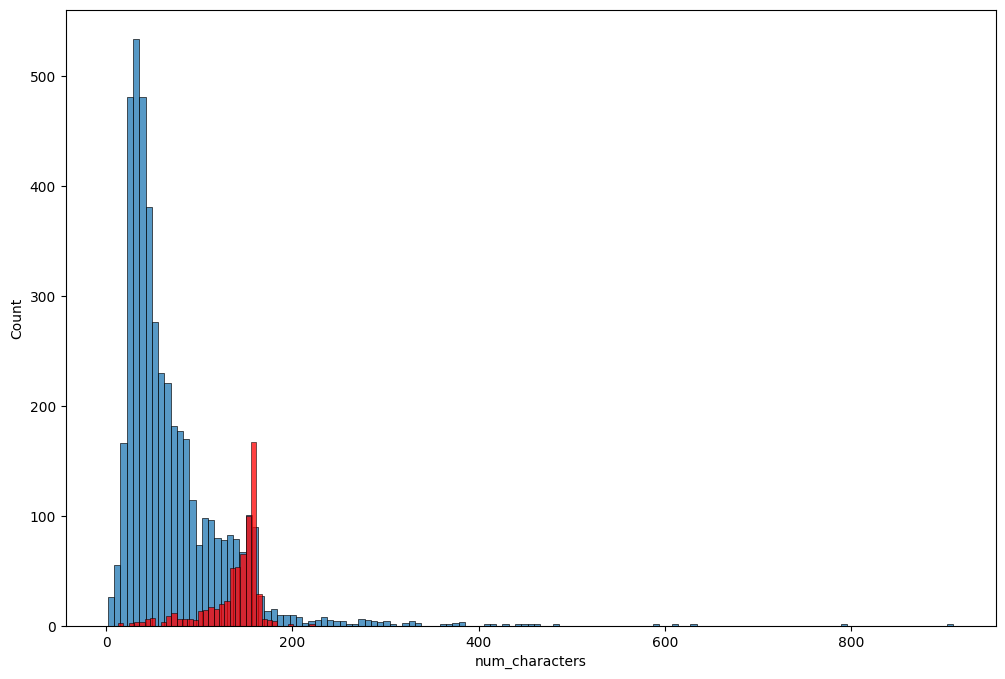

In [17]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color="red")

##### We can see spam messages are quite long with more characters

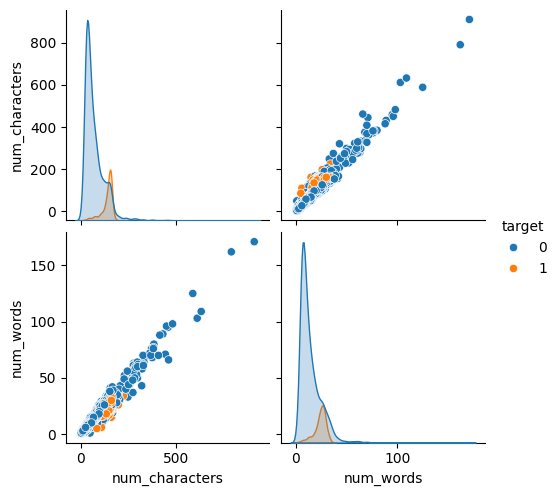

In [18]:
sns.pairplot(df, hue='target')

# Data preprocessing



In [19]:
#Data preprocessing
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

## Removing stop words from sentences

In [20]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## Removing punctuation from sentences

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Changing similar words into one (love, loving,loved into love)

In [22]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('loving')

'love'

## Process and clean the data

In [23]:
def transform_text(text):
    text = text.lower()
    text = text.split()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [24]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin'

## New column with cleaned data

In [25]:
df['transformed_text'] = df['text'].apply(transform_text)

In [26]:
df.head()

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah think goe live around though


## Showing the most repeated words in a doagram

In [29]:
from wordcloud import WordCloud

wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')

In [35]:
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

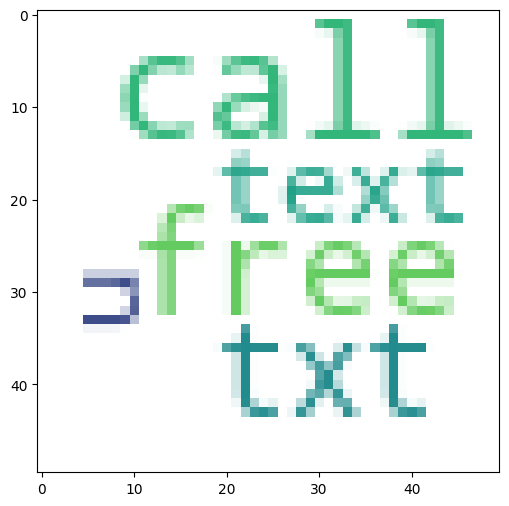

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [42]:
spam_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

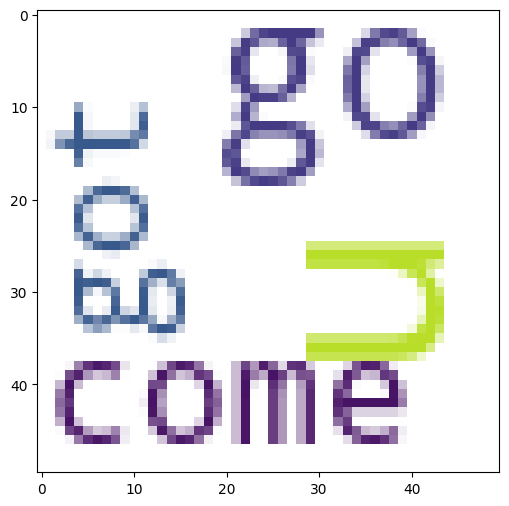

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# Counting the most famous words in scam

In [46]:
# spam most famous words

spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

8176

# Showing the words that are most repeated using a barplot

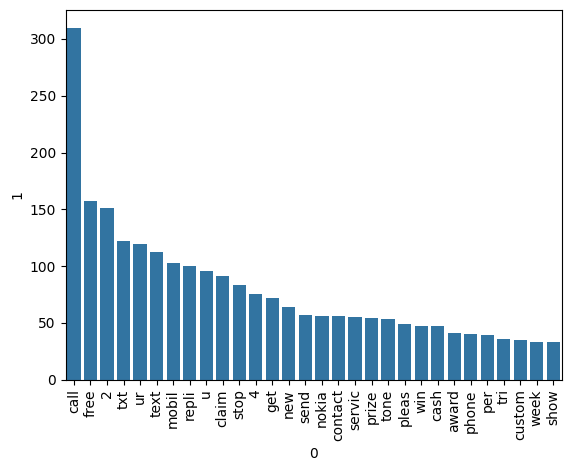

In [61]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [65]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [66]:
len(ham_corpus)

27382

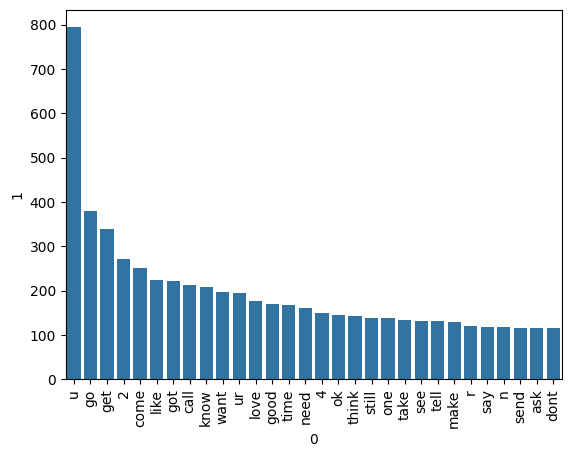

In [67]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# Training the data

In [90]:
### MOdel building
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [91]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [108]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
y = df['target'].values

In [110]:
y


array([0, 0, 1, ..., 0, 0, 0])

## Breaking into training and testing data

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


## Using different models to train the data and finding the best one

In [114]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [115]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7920696324951644
[[701 195]
 [ 20 118]]
0.3769968051118211


# The most effective model which has precision value of 1

In [116]:
# i am getting precision 1 so i will use this

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9661508704061895
[[883  13]
 [ 22 116]]
0.8992248062015504


In [117]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9709864603481625
[[892   4]
 [ 26 112]]
0.9655172413793104


In [118]:
# tdidf -> mnb

# Creating the trained model and saving into file using pickle.

In [120]:
import pickle
pickle.dump(tfidf, open('vetorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))